# Uber Rider Data Case Study

BitTiger DS203

December 2016

##  Project overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users who signed up for an account in January 2014. The data was pulled several months later. 

## Dataset description

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY­MM­DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY­MM­DD’ 
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## Load data and browse data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Load data from file
df = pd.read_csv('data/churn.csv')

In [3]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Browse dataset
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [5]:
# Show summary stats
df.describe()

/Users/stone/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,NaN,NaN,1.000000,0.000000,0.000000,33.300000
50%,3.880000,NaN,NaN,1.000000,0.000000,1.000000,66.700000
75%,6.940000,NaN,NaN,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

## Explore data

### Numeric variables

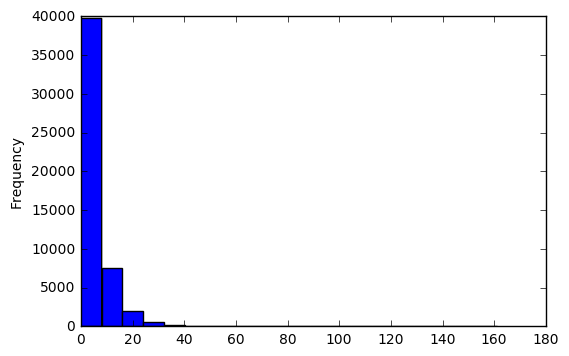

In [7]:
df['avg_dist'].plot.hist(bins=20)

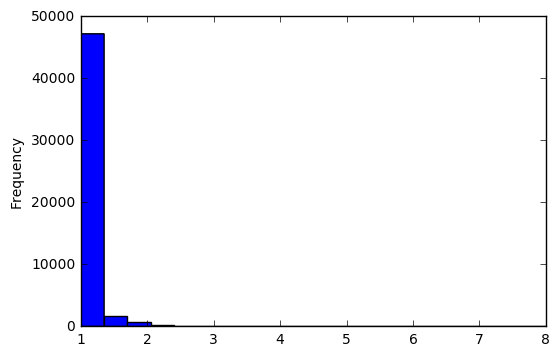

In [8]:
df['avg_surge'].plot.hist(bins=20)

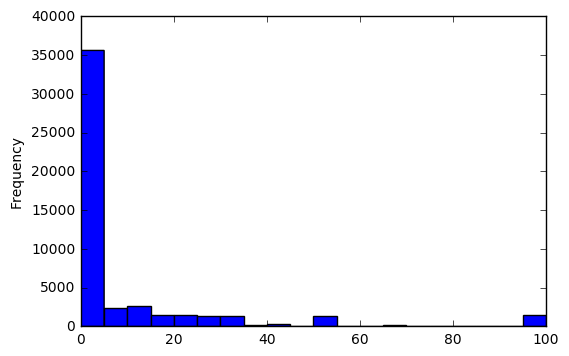

In [9]:
df['surge_pct'].plot.hist(bins=20)

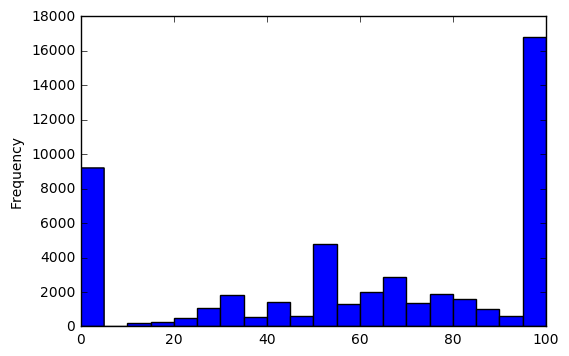

In [10]:
df['weekday_pct'].plot.hist(bins=20)

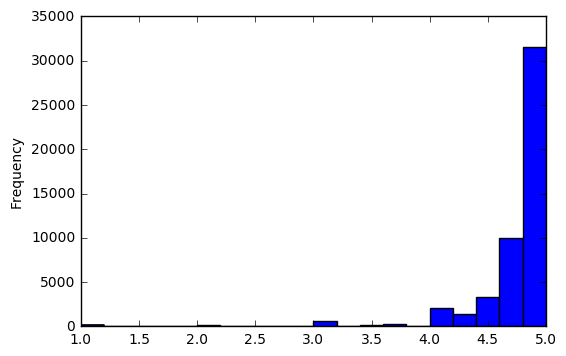

In [11]:
df['avg_rating_by_driver'].plot.hist(bins=20)

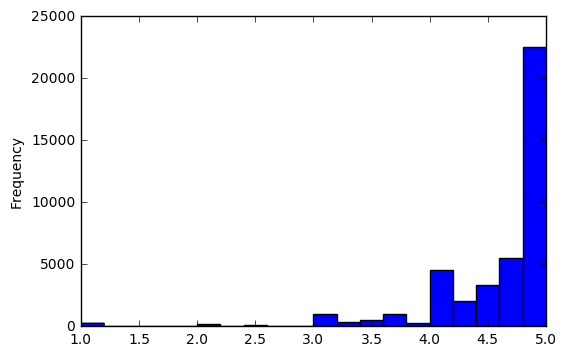

In [12]:
df['avg_rating_of_driver'].plot.hist(bins=20)

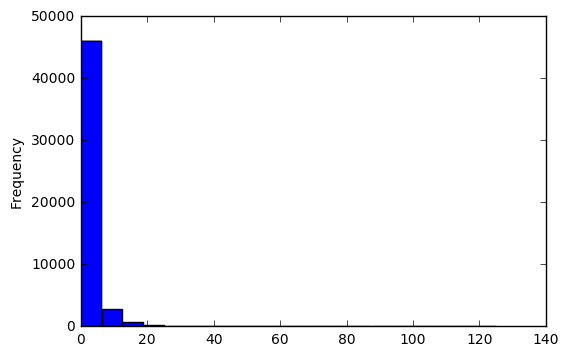

In [13]:
df['trips_in_first_30_days'].plot.hist(bins=20)

In [14]:
# # Use scatter_matrix from Pandas
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
#                alpha=0.2, figsize=(16, 16), diagonal='hist')
# plt.show()

In [15]:
# # Use scatter_matrix from Pandas
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
#                alpha=0.2, figsize=(8, 8), diagonal='kde')
# plt.show()

### Categorical variables

In [16]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

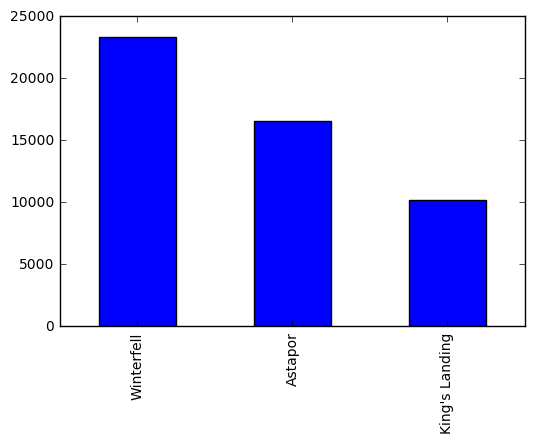

In [17]:
df['city'].value_counts().plot.bar()

In [18]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

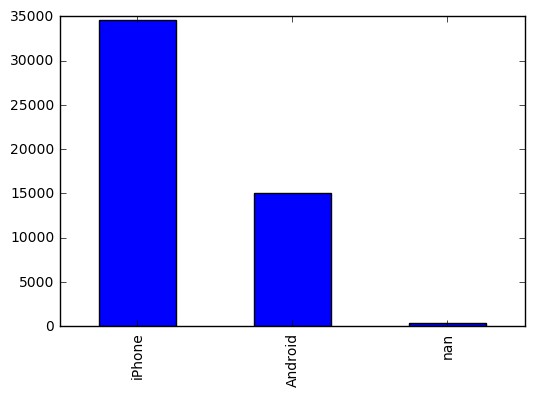

In [19]:
df['phone'].value_counts(dropna=False).plot.bar()

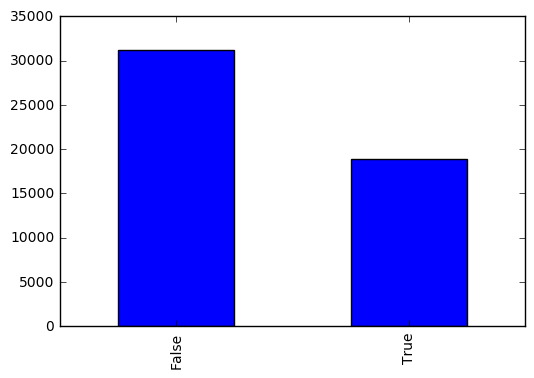

In [20]:
df['luxury_car_user'].value_counts().plot.bar()

## Clean data - dealing with missing values

In [21]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

#### Option 1: drop all rows that have missing values

In [22]:
df_dropna = df.dropna(axis=0)

In [23]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
df_dropna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Option 2: fill missing values

In [25]:
# Make a copy of df, because you don't want to mess up with orignal df when you experiment stuff
df_fillna = df.copy()

In [26]:
# Fill missing value for phone
df_fillna['phone'] = df['phone'].fillna('no_phone')

In [27]:
# Fill missing values with median
df_fillna['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())
df_fillna['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [28]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
df_fillna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Decision
We need to decide whether we should exclude data with missing value. We need statistical tools to help us decide. 


In [30]:
# For now we will move on (to be revisited)
df = df_fillna

## Transform data

### Time-series variables

In [31]:
# convert time-series information to datetime data type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [32]:
# construct a new df to experiment on the time-series 
df_timestamp = df[['last_trip_date', 'signup_date']].copy()

In [33]:
df_timestamp['count'] = 1

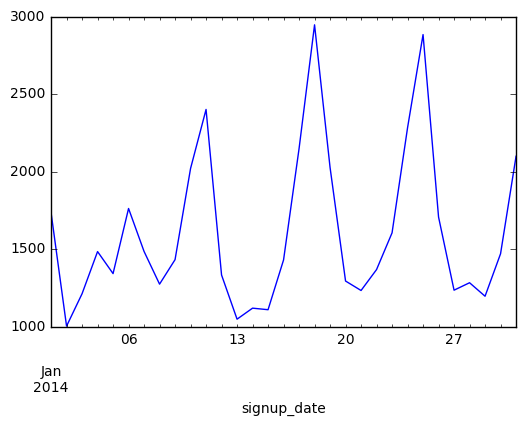

In [34]:
df_timestamp = df_timestamp.set_index('signup_date')
df_timestamp['count'].resample("1D").sum().plot()

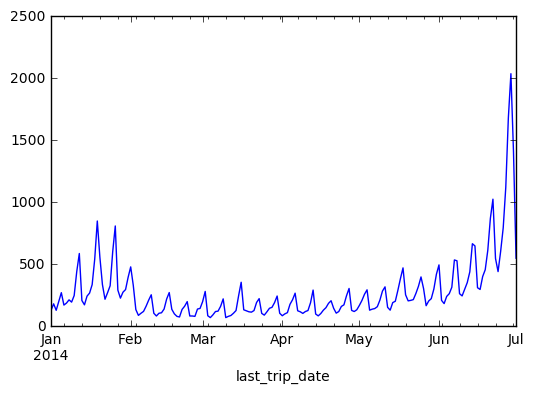

In [35]:
df_timestamp = df_timestamp.set_index('last_trip_date')
df_timestamp['count'].resample("1D").sum().plot()

In [36]:
# Experiment block
date_in_string = '2014-06-01'
date_in_datetime = pd.to_datetime(date_in_string)
print date_in_datetime
print date_in_datetime.dayofweek

2014-06-01 00:00:00
6


In [37]:
# There might be some signal from day of week when a user signed up Uber, so let's create a column for that
df['signup_dow'] = df['signup_date'].apply(lambda x: x.dayofweek)

In [38]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Converting categorical variables

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
signup_dow                50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


Categorical variables:
* city
* phone
* luxury_car_user
* signup_dow

#### Convert bool columns to int

In [40]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [41]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


#### Encode categorical columns to numeric values

In [42]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [43]:
col_category = ['signup_dow', 'city', 'phone']

In [44]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [45]:
df_dummies

,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [46]:
df = df.join(df_dummies)

In [47]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [48]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'signup_dow', u'signup_dow_0', u'signup_dow_1',
       u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', u'signup_dow_5',
       u'signup_dow_6', u'city_Astapor', u'city_King's Landing',
       u'city_Winterfell', u'phone_Android', u'phone_iPhone',
       u'phone_no_phone'],
      dtype='object')

## Define a label/target/outcome

Add churn indicator. Considered to churn if have not taken a trip in the last 30 days. In practice, you will often have to figure out how to generate a reasonable label to train your dataset. Is the cutoff of 30 days reasonable?  You may want to test this... Sometimes, the correct label is even less obvious; your ability to make a sensible (and defensible) decision in these cases is important.

In [49]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0


In [50]:
df['churn'].mean()

0.62392000000000003

In [51]:
df['active'].mean()

0.37608000000000003

## EDA with label

### colored scatter_matrix

In [52]:
colors = ['red' if ix else 'blue' for ix in df['active']]

In [53]:
# scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', 
#                   u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
#                alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
# plt.show()

### Explore churn rate split by features 

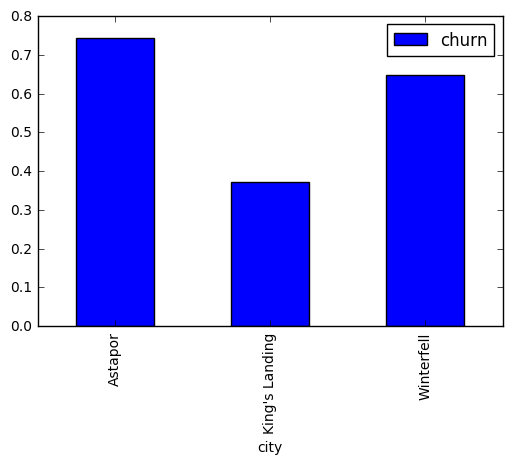

In [54]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

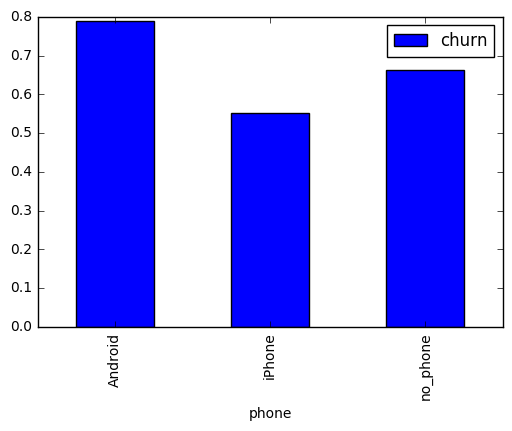

In [55]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

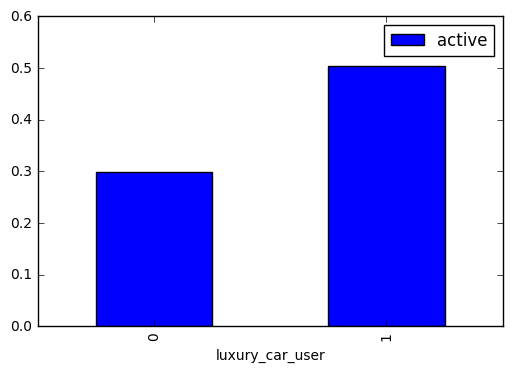

In [56]:
df[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar()

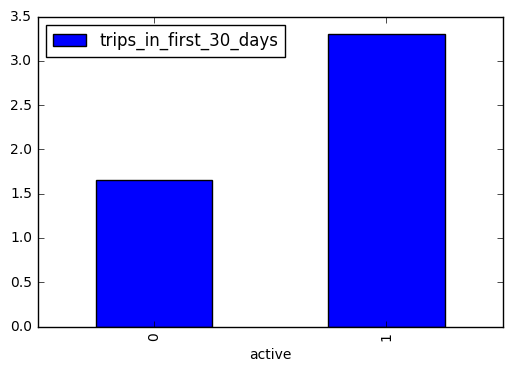

In [57]:
df[['trips_in_first_30_days', 'active']].groupby(['active']).mean().plot.bar()

In [58]:
is_active = df['active'] == 1

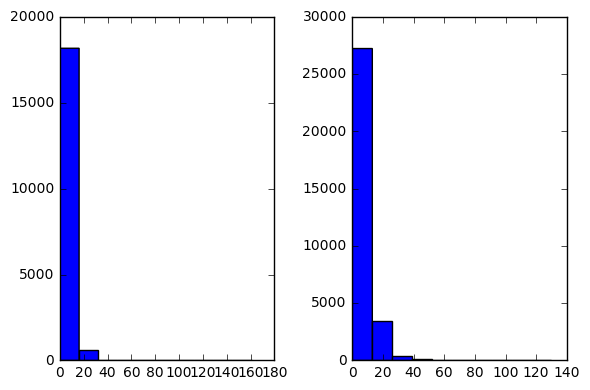

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_dist'].values)
axes[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

#### Abstract out the plotting machine

In [60]:
def hist_active_vs_churn(df, col_name):
    is_active = df['active'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

In [61]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'signup_dow', u'signup_dow_0', u'signup_dow_1',
       u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', u'signup_dow_5',
       u'signup_dow_6', u'city_Astapor', u'city_King's Landing',
       u'city_Winterfell', u'phone_Android', u'phone_iPhone',
       u'phone_no_phone', u'churn', u'active'],
      dtype='object')

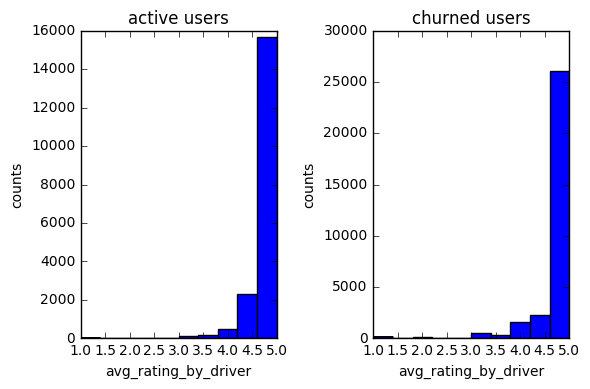

In [62]:
hist_active_vs_churn(df, col_name=u'avg_rating_by_driver')

In [63]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge']

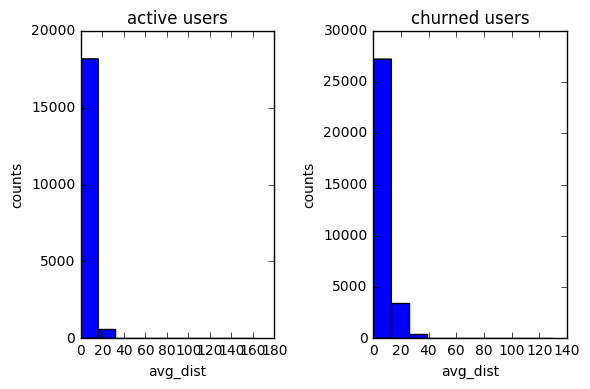

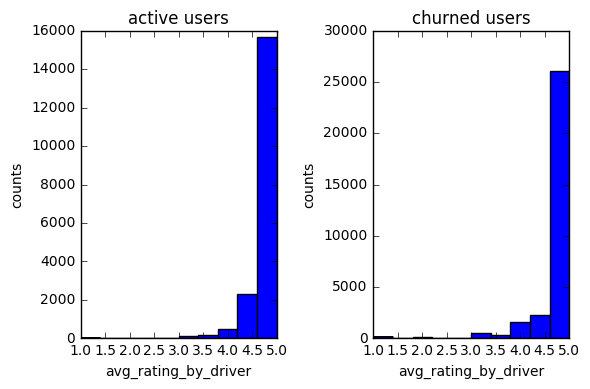

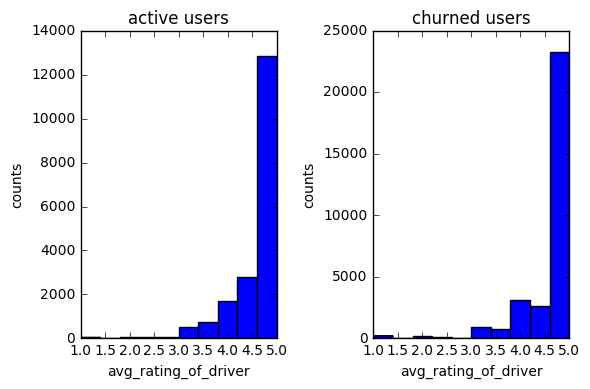

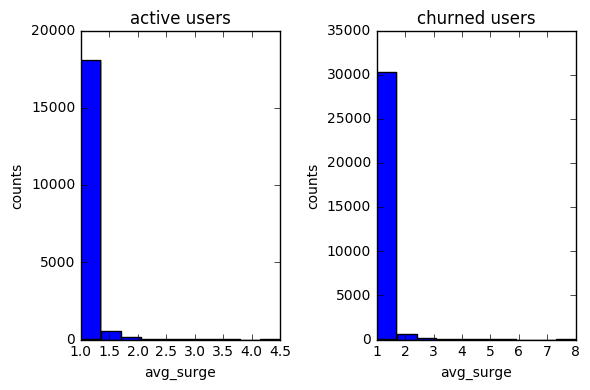

In [64]:
for col in cols:
    hist_active_vs_churn(df, col_name=col)

## Save cleaned data to csv file

### Select which columns to be saved

In [65]:
selected_columns = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'signup_dow_0', 
                     u'signup_dow_1', u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', 
                     u'signup_dow_5', u'signup_dow_6', u'churn']

### Save to csv file


In [66]:
cleaned_data_csv = 'data/cleaned_data.csv'
df[selected_columns].to_csv(cleaned_data_csv, index=False)

## Build Logistic Regression Model

### Reload data from cleaned csv file

In [67]:
import pandas as pd
cleaned_data_csv = 'data/cleaned_data.csv'
df = pd.read_csv(cleaned_data_csv)

In [68]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,...,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,churn
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null int64
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null float64
city_King's Landing       50000 non-null float64
city_Winterfell           50000 non-null float64
phone_Android             50000 non-null float64
phone_iPhone              50000 non-null float64
phone_no_phone            50000 non-null float64
signup_dow_0              50000 non-null float64
signup_dow_1              50000 non-null float64
signup_dow_2              50000 non-null float64
signup_dow_3              50000 non-null float64
signup_dow_4 

In [70]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,...,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,...,0.691640,0.007920,0.106860,0.102480,0.133760,0.138900,0.195340,0.194400,0.128260,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,...,0.461821,0.088642,0.308938,0.303282,0.340398,0.345846,0.396466,0.395742,0.334382,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Define Features and Target

In [71]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'signup_dow_0', 
                     u'signup_dow_1', u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', 
                     u'signup_dow_5', u'signup_dow_6']
target = u'churn'

In [72]:
X = df[selected_features].values
y = df['churn'].values

In [73]:
X.shape

(50000, 21)

In [74]:
y

array([0, 1, 1, ..., 1, 1, 1])

### Use our own implementation of Logistic Regression Model

In [75]:
# from my_LogisticRegression import *

In [76]:
%load_ext autoreload
%autoreload 2

In [77]:
from my_LogisticRegression import log_likelihood, log_likelihood_gradient, predict, predict_proba
from my_LogisticRegression import GradientAscent
from my_LogisticRegression import precision, accuracy, recall

In [78]:
ga = GradientAscent(cost=log_likelihood, 
                    gradient=log_likelihood_gradient, 
                    predict_func=predict,
                    fit_intercept=True)
ga.run(X, y, alpha=0.1, num_iterations=2000)

In [79]:
def plot_cost(cost_history, ax, alpha=1.0):
    """Plot the in sample cost of a gradient ascent run over time."""
    ax.plot(range(len(cost_history)), cost_history, alpha=alpha)
    ax.set_title("Logistic Regression Cost Function Over Time")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Cost")

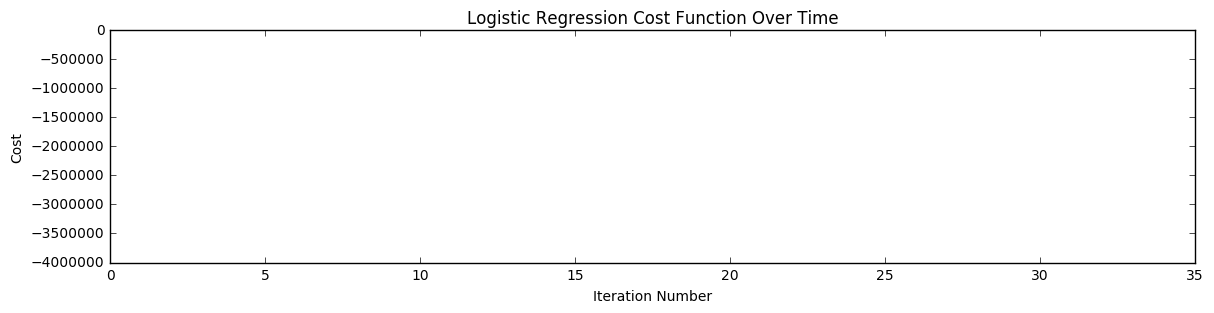

In [80]:
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(ga.cost_history, ax)

In [81]:
ga.cost_history[:10]

[nan,
 -3094117.6857414916,
 nan,
 -188030.84655037857,
 nan,
 nan,
 -1904980.6855713502,
 nan,
 nan,
 -3500544.0637736451]

### Use standardized features

In [82]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [83]:
ga = GradientAscent(cost=log_likelihood, 
                    gradient=log_likelihood_gradient, 
                    predict_func=predict,
                    fit_intercept=True)
ga.run(X, y, alpha=0.1, num_iterations=5000)

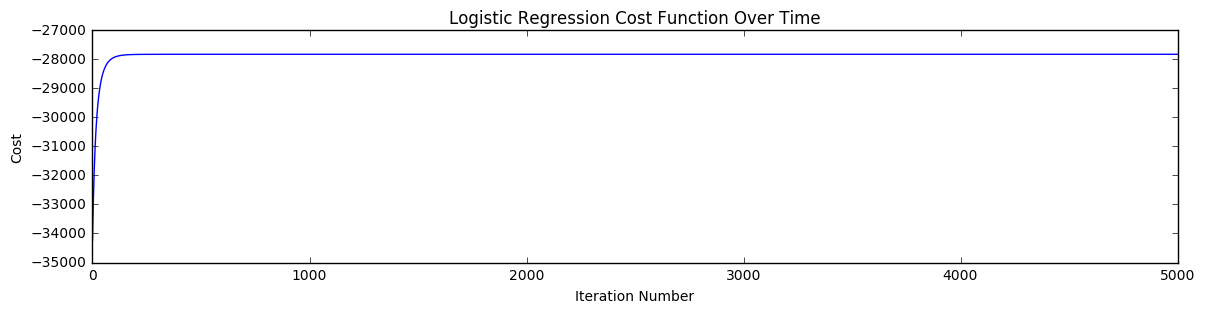

In [84]:
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(ga.cost_history, ax)

In [85]:
y_pred = ga.predict(X)

print("The predicted class vector is \n{}".format(str(y_pred)))
print("The actual class vector is \n{}".format(str(y)))

The predicted class vector is 
[0 1 1 ..., 1 1 1]
The actual class vector is 
[0 1 1 ..., 1 1 1]


In [86]:
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.71848
Precision of the Logistic Regression is: 0.736791147994
Recall of the Logistic Regression is: 0.853795358379


In [87]:
y.mean()

0.62392000000000003

### Understanding the Estimated Coefficients

In [88]:
ga.coeffs

array([ 0.59988142,  0.20656155,  0.06882503,  0.07319855,  0.04487912,
       -0.08144446, -0.45052554, -0.42177596, -0.00110267,  0.30122346,
       -0.43507463,  0.06646648,  0.24998938, -0.24959686,  0.00745004,
       -0.00929664,  0.00819615, -0.00540098,  0.01768195,  0.02107886,
       -0.01305496, -0.02117653])

In [89]:
selected_features

[u'avg_dist',
 u'avg_rating_by_driver',
 u'avg_rating_of_driver',
 u'avg_surge',
 u'surge_pct',
 u'trips_in_first_30_days',
 u'luxury_car_user',
 u'weekday_pct',
 u'city_Astapor',
 u"city_King's Landing",
 u'city_Winterfell',
 u'phone_Android',
 u'phone_iPhone',
 u'phone_no_phone',
 u'signup_dow_0',
 u'signup_dow_1',
 u'signup_dow_2',
 u'signup_dow_3',
 u'signup_dow_4',
 u'signup_dow_5',
 u'signup_dow_6']

In [90]:
zip(selected_features, ga.coeffs)

[(u'avg_dist', 0.59988141780412085),
 (u'avg_rating_by_driver', 0.20656155005337704),
 (u'avg_rating_of_driver', 0.068825034296664755),
 (u'avg_surge', 0.073198554760301363),
 (u'surge_pct', 0.044879116860896691),
 (u'trips_in_first_30_days', -0.081444457390822539),
 (u'luxury_car_user', -0.45052554441377479),
 (u'weekday_pct', -0.42177596377091309),
 (u'city_Astapor', -0.0011026732879121917),
 (u"city_King's Landing", 0.30122345639903769),
 (u'city_Winterfell', -0.4350746284984004),
 (u'phone_Android', 0.066466480437488651),
 (u'phone_iPhone', 0.2499893774852151),
 (u'phone_no_phone', -0.24959685972722251),
 (u'signup_dow_0', 0.0074500381707747268),
 (u'signup_dow_1', -0.0092966403346013849),
 (u'signup_dow_2', 0.0081961508226978692),
 (u'signup_dow_3', -0.0054009772403284476),
 (u'signup_dow_4', 0.017681948563316112),
 (u'signup_dow_5', 0.021078864808577024),
 (u'signup_dow_6', -0.013054955333806725)]

In [91]:
df_coeffs = pd.DataFrame(list(zip(selected_features, ga.coeffs))).sort_values(by=[1], ascending=False)

In [92]:
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
0,avg_dist,0.599881
9,city_King's Landing,0.301223
12,phone_iPhone,0.249989
1,avg_rating_by_driver,0.206562
3,avg_surge,0.073199
2,avg_rating_of_driver,0.068825
11,phone_Android,0.066466
4,surge_pct,0.044879
19,signup_dow_5,0.021079
18,signup_dow_4,0.017682


In [93]:
import matplotlib.pyplot as plt
% matplotlib inline

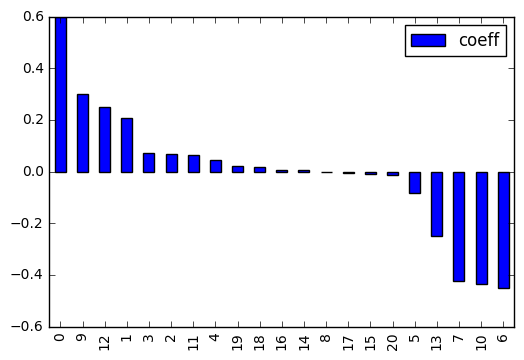

In [94]:
ax = df_coeffs.plot.bar()

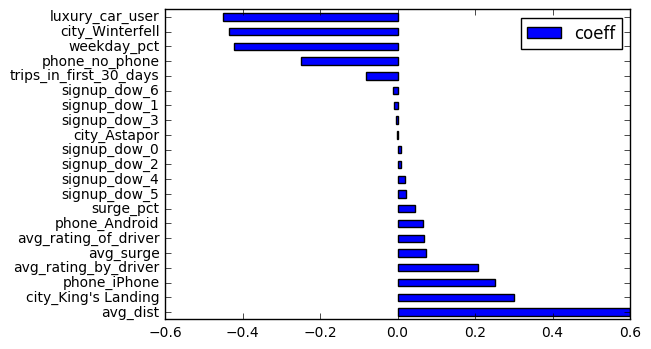

In [95]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### How to interpret coefficient?

***Recall: Increasing the value of $x_i$ by 1 increases the odds ratio by a factor of $e^{\beta_i}$***

Say, for a given user, assume he has a probability to churn at 50%, or in another word, the odd ratio is 1:1 = 1

In [96]:
default_OR = 1 # 50% chance to churn

If a coefficient is 0.2, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [97]:
beta = 0.2
increase = np.exp(beta)
OR = default_OR * increase
OR

1.2214027581601699

Which is can be converted to chance to churn:

In [98]:
p = OR / (1 + OR)
p

0.54983399731247795

If a coefficient is -0.4, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [99]:
beta = -0.4
increase = np.exp(beta) * 1
OR = default_OR * increase
OR

0.67032004603563933

Which is can be converted to chance to churn:

In [100]:
p = OR / (1 + OR)
p

0.401312339887548

### Check the result with our EDA

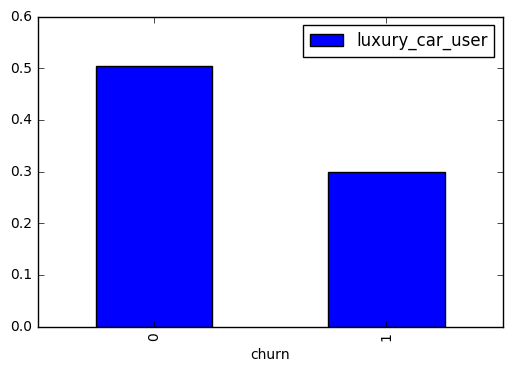

In [101]:
df[['luxury_car_user', 'churn']].groupby(['churn']).mean().plot.bar()

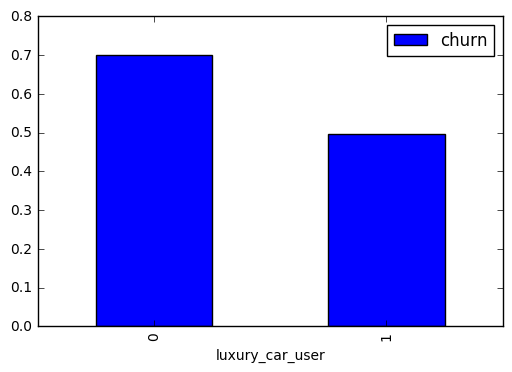

In [102]:
df[['luxury_car_user', 'churn']].groupby(['luxury_car_user']).mean().plot.bar()

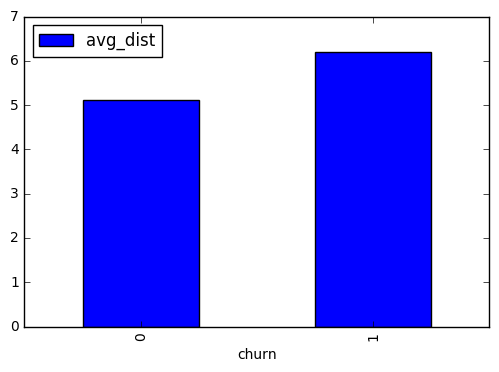

In [103]:
df[['avg_dist', 'churn']].groupby(['churn']).mean().plot.bar()

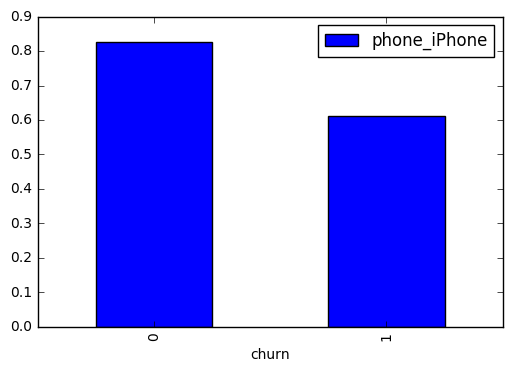

In [104]:
df[['phone_iPhone', 'churn']].groupby(['churn']).mean().plot.bar()

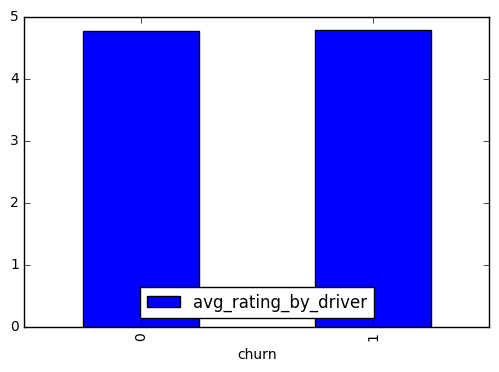

In [105]:
df[['avg_rating_by_driver', 'churn']].groupby(['churn']).mean().plot.bar()
plt.legend(loc='lower center')

### Use Logistic Regression from sklearn

In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100000, fit_intercept=True)
lr.fit(X, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [107]:
y_pred = lr.predict(X)
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.71848
Precision of the Logistic Regression is: 0.736791147994
Recall of the Logistic Regression is: 0.853795358379


In [108]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.301224
11,phone_Android,0.249989
0,avg_dist,0.206563
2,avg_rating_of_driver,0.073198
1,avg_rating_by_driver,0.068825
10,city_Winterfell,0.066467
3,avg_surge,0.044871
18,signup_dow_4,0.021079
17,signup_dow_3,0.017682
15,signup_dow_1,0.008196


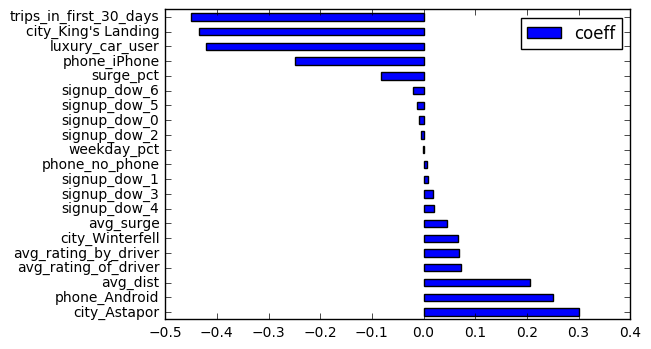

In [109]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Use polynomial features - high orders!

In [110]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
X_poly = PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X)

In [112]:
X_poly.shape

(50000, 232)

In [113]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000000, fit_intercept=True)
lr.fit(X_poly, y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [114]:
y_pred = lr.predict(X_poly)
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.7353
Precision of the Logistic Regression is: 0.752680003376
Recall of the Logistic Regression is: 0.857513783818


### Use train and test set

In [115]:
from sklearn.cross_validation import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [117]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(35000, 21) (35000,)
(15000, 21) (15000,)


In [118]:
lr = LogisticRegression(C=0.1, fit_intercept=True)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
y_train_pred = lr.predict(X_train)
print("Training score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y_train, y_train_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y_train, y_train_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y_train, y_train_pred)))

Training score:
Accuracy of the Logistic Regression is: 0.719771428571
Precision of the Logistic Regression is: 0.737698428407
Recall of the Logistic Regression is: 0.854150433148


In [120]:
y_test_pred = lr.predict(X_test)
print("Test score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y_test, y_test_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y_test, y_test_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y_test, y_test_pred)))

Test score:
Accuracy of the Logistic Regression is: 0.716333333333
Precision of the Logistic Regression is: 0.738903394256
Recall of the Logistic Regression is: 0.844866190425


### Model Evaluation

#### Confusion Matrix

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(y_test, y_test_pred)

array([[2821, 2800],
       [1455, 7924]])

In [123]:
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[10014  8790]
 [ 4445 26751]]


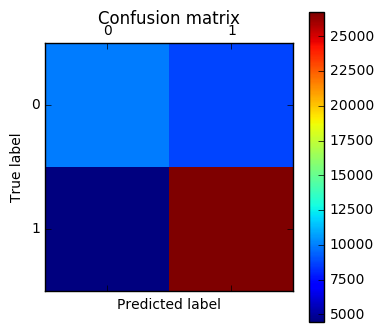

In [124]:
plot_confusion_matrix(y, y_pred)

#### classification report

In [125]:
from sklearn.metrics import classification_report
print classification_report(y, y_pred)

             precision    recall  f1-score   support

          0       0.69      0.53      0.60     18804
          1       0.75      0.86      0.80     31196

avg / total       0.73      0.74      0.73     50000



In [126]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [127]:
lr.predict_proba(X)

array([[ 0.84976306,  0.15023694],
       [ 0.06305837,  0.93694163],
       [ 0.29166287,  0.70833713],
       ..., 
       [ 0.22469365,  0.77530635],
       [ 0.29897268,  0.70102732],
       [ 0.07634397,  0.92365603]])

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

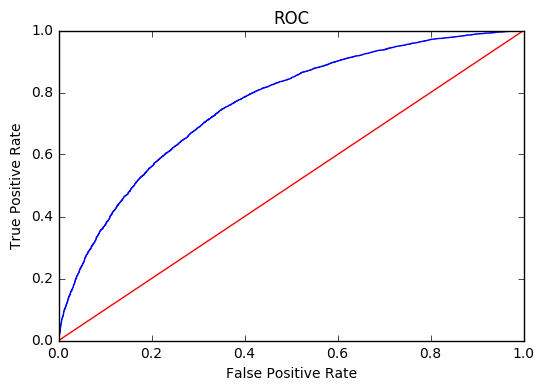

In [129]:
plt.plot(fpr, tpr)

# 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='red')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()

In [130]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_train, y_train_pred)))

Area Under Curve (AUC) of the Logistic Regression is: 0.675766713199


#### Recall-Precision Curve

In [131]:
prec, rec, thresholds = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])

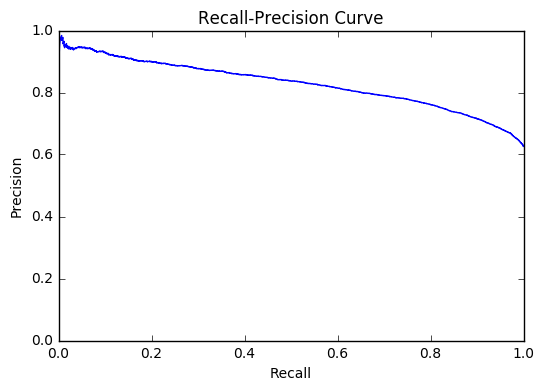

In [132]:
plt.plot(rec, prec)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")

plt.show()

### Profit Curve

In [133]:
def standard_confusion_matrix(y_true, y_predict):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_predict)
    return np.array([[tp, fp], [fn, tn]])

def profit_curve(cost_benefit_matrix, probabilities, y_true):
    thresholds = sorted(probabilities, reverse=True)
    profits = []
    for threshold in thresholds:
        y_predict = probabilities > threshold
        confusion_mat = standard_confusion_matrix(y_true, y_predict)
        profit = np.sum(confusion_mat * cost_benefit_matrix) / float(len(y_true))
        profits.append(profit)
    return thresholds, profits

def run_profit_curve(model, costbenefit, X_train, X_test, y_train, y_test):
    probabilities = model.predict_proba(X_test)[:, 1]
    thresholds, profits = profit_curve(costbenefit, probabilities, y_test)
    return thresholds, profits

def plot_profit_model(model, costbenefit, X_train, X_test, y_train, y_test):
    percentages = np.linspace(0, 100, len(y_test))
    thresholds, profits = run_profit_curve(model,
                                           costbenefit,
                                           X_train, X_test,
                                           y_train, y_test)
    plt.plot(percentages, profits, label=model.__class__.__name__)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    
def find_best_threshold(model, costbenefit, X_train, X_test, y_train, y_test):
    max_threshold = None
    max_profit = None

    thresholds, profits = run_profit_curve(model, costbenefit,
                                           X_train, X_test,
                                           y_train, y_test)
    max_index = np.argmax(profits)
    if profits[max_index] > max_profit:
        max_threshold = thresholds[max_index]
        max_profit = profits[max_index]
    return max_threshold, max_profit

#### Train-test split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Build model

In [135]:
lr = LogisticRegression(C=0.1, fit_intercept=True)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [137]:
y_train_pred = lr.predict(X_train)
print("Training score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
print("Precision of the Logistic Regression is: {}".format(precision_score(y_train, y_train_pred)))
print("Recall of the Logistic Regression is: {}".format(recall_score(y_train, y_train_pred)))
print("f1-score of the Logistic Regression is: {}".format(f1_score(y_train, y_train_pred)))
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_train, y_train_pred)))

Training score:
Accuracy of the Logistic Regression is: 0.719305263158
Precision of the Logistic Regression is: 0.737510189822
Recall of the Logistic Regression is: 0.854396438328
f1-score of the Logistic Regression is: 0.791662109161
Area Under Curve (AUC) of the Logistic Regression is: 0.674663347168


In [138]:
y_test_pred = lr.predict(X_test)
print("Test score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Test score:
Accuracy of the Logistic Regression is: 0.706
Precision of the Logistic Regression is: 0.726815642458
Recall of the Logistic Regression is: 0.840982546865
f1-score of the Logistic Regression is: 0.779742283488
Area Under Curve (AUC) of the Logistic Regression is: 0.663933036287


#### Define cost-benefit matrix based on business input

In [139]:
costbenefit = np.array([[20, -20], [0, 0]])
costbenefit

array([[ 20, -20],
       [  0,   0]])

#### Plot profit curve 

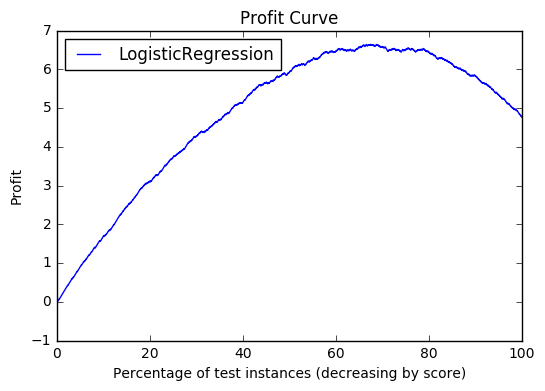

In [140]:
plot_profit_model(lr, costbenefit, X_train, X_test, y_train, y_test)

In [141]:
max_threshold, max_profit = find_best_threshold(lr, costbenefit, X_train, X_test, y_train, y_test)

#### Find the best threshold

In [142]:
print("The best threshold is {}, which gives a max profit of {}".format(max_threshold, max_profit))

The best threshold is 0.551173771819, which gives a max profit of 6.64


#### Make predictions on new threshold

In [143]:
y_test_pred = (lr.predict_proba(X_test)[:,1] >= max_threshold).astype(int)
print("Test score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Test score:
Accuracy of the Logistic Regression is: 0.7128
Precision of the Logistic Regression is: 0.749248346362
Recall of the Logistic Regression is: 0.805429864253
f1-score of the Logistic Regression is: 0.776323987539
Area Under Curve (AUC) of the Logistic Regression is: 0.683932140941


## More Machine Learning Models

In [144]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_scores(y_train, y_train_predict, y_test, y_test_predict):
    """
    Print precision, recall, accuracy and f1 scores.
    """
    train_precision = precision_score(y_train, y_train_predict) 
    train_recall = recall_score(y_train, y_train_predict)
    train_accuracy = accuracy_score(y_train, y_train_predict)
    train_f1 = f1_score(y_train, y_train_predict)

    test_precision = precision_score(y_test, y_test_predict)
    test_recall = recall_score(y_test, y_test_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    test_f1 = f1_score(y_test, y_test_predict)

    print "Training score:"
    print train_precision, train_recall, train_accuracy, train_f1
    print "Testing score:"
    print test_precision, test_recall, test_accuracy, test_f1
    
    df_result = pd.DataFrame(data={"Precision": [train_precision, test_precision], 
                                   "Recall": [train_recall, test_recall],
                                   "Accuracy": [train_accuracy, train_f1],
                                   "F1-Score": [train_f1, test_f1]}, 
                             index=["Training Set", "Testing Set"],
                             columns=["Precision", "Recall", "Accuracy", "F1-Score"]
                            )
    return df_result

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression


In [146]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print_scores(y_train, y_train_predict, y_test, y_test_predict)

Training score:
0.737689993667 0.854242104781 0.7198 0.791699411652
Testing score:
0.738834498834 0.844866190425 0.716266666667 0.788300835655


,Precision,Recall,Accuracy,F1-Score
Training Set,0.737690,0.854242,0.719800,0.791699
Testing Set,0.738834,0.844866,0.791699,0.788301


### K-Nearest Neighbors


In [147]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print_scores(y_train, y_train_predict, y_test, y_test_predict)

Training score:
0.836286321758 0.865380208095 0.810485714286 0.850584551618
Testing score:
0.778793228788 0.799552191065 0.732666666667 0.789036195286


,Precision,Recall,Accuracy,F1-Score
Training Set,0.836286,0.865380,0.810486,0.850585
Testing Set,0.778793,0.799552,0.850585,0.789036


### Bagging


In [175]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print_scores(y_train, y_train_predict, y_test, y_test_predict)

Training score:
0.999496013928 0.999908328368 0.999628571429 0.999702128635
Testing score:
0.798654940507 0.823008849558 0.7596 0.810649023314


,Precision,Recall,Accuracy,F1-Score
Training Set,0.999496,0.999908,0.999629,0.999702
Testing Set,0.798655,0.823009,0.999702,0.810649


### Random Forest


In [174]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=100)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print_scores(y_train, y_train_predict, y_test, y_test_predict)

Training score:
0.999633414288 0.999908328368 0.999714285714 0.999770852429
Testing score:
0.79949953081 0.817571169634 0.757733333333 0.808434370058


,Precision,Recall,Accuracy,F1-Score
Training Set,0.999633,0.999908,0.999714,0.999771
Testing Set,0.799500,0.817571,0.999771,0.808434


In [149]:
def plot_importance(clf, col_names, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (col_names[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

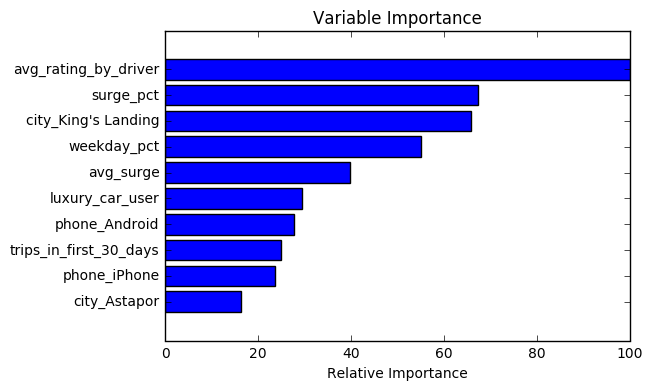

In [150]:
plot_importance(clf, df.columns, max_features=10)

In [151]:
import sklearn.learning_curve as curves
from sklearn.cross_validation import ShuffleSplit

def plt_max_features(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.3, random_state=1)

    # Vary the max_depth parameter from 1 to 10
    features_range = np.arange(1, 12)

    # Create a Random Forest classifier at optimal settings
    clf = RandomForestClassifier(max_depth=8, n_estimators=100, random_state=1)
  
    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(clf, X, y, 
                                                        param_name='max_features', 
                                                        param_range=features_range, 
                                                        cv=cv, 
                                                        scoring='f1')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Random Forest Classifier Complexity Performance')
    plt.plot(features_range, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(features_range, test_mean, 'o-', color = 'g', label = 'Testing Score')
    plt.fill_between(features_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
    plt.fill_between(features_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
    
    # Visual aesthetics
    plt.legend(loc='lower right')
    plt.xlabel('Maximum Features')
    plt.ylabel('F1 Score')
    plt.ylim([0.75,0.90])
    plt.show()

def plt_max_depth(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.3, random_state=1)

    # Vary the max_depth parameter from 1 to 10
    depth_range = np.arange(1, 12)

    # Create a Random Forest classifier at optimal settings
    clf = RandomForestClassifier(max_features=10, n_estimators=100, random_state=1)
  
    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(clf, X, y,
                                                        param_name='max_depth', 
                                                        param_range=depth_range, 
                                                        cv=cv, 
                                                        scoring='f1')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Random Forest Classifier Complexity Performance')
    plt.plot(depth_range, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(depth_range, test_mean, 'o-', color = 'g', label = 'Testing Score')
    plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('F1 Score')
    plt.ylim([0.60,0.95])
    plt.show()

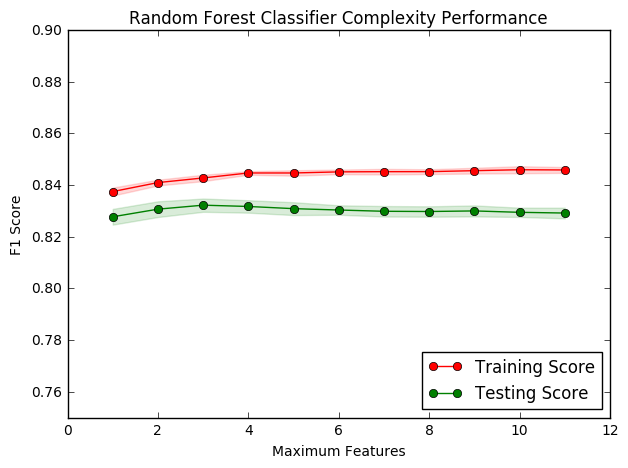

In [152]:
plt_max_features(X_train, y_train)

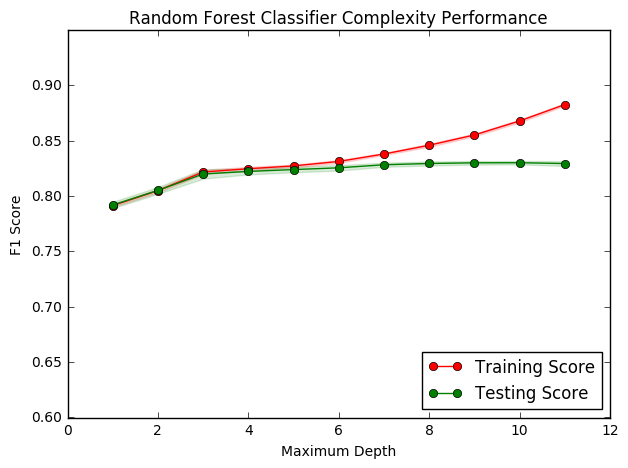

In [153]:
plt_max_depth(X_train, y_train)

### AdaBoosting


In [154]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print_scores(y_train, y_train_predict, y_test, y_test_predict)

Training score:
0.806126802628 0.86602190952 0.786657142857 0.835001657275
Testing score:
0.804160832166 0.857234246721 0.7802 0.829849821954


,Precision,Recall,Accuracy,F1-Score
Training Set,0.806127,0.866022,0.786657,0.835002
Testing Set,0.804161,0.857234,0.835002,0.829850


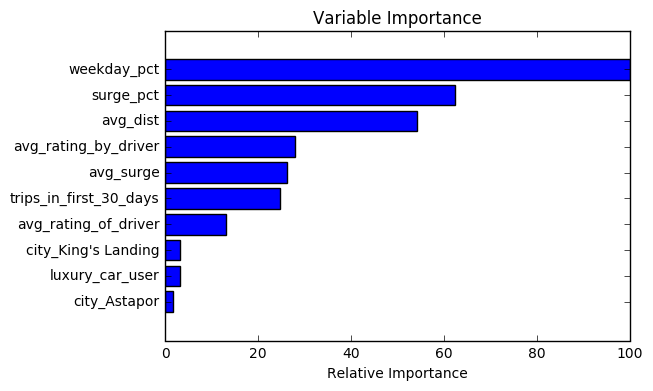

In [155]:
plot_importance(clf, df.columns, max_features=10)

In [156]:
def plot_staged_score(clf, params, X_train, y_train, X_test, y_test):
    '''Plot training deviance. From sklearn documentation'''    
    # compute train set accuracy score    
    train_score = np.array(list(clf.staged_score(X_train, y_train)))
    # compute test set accuracy score    
    test_score = np.array(list(clf.staged_score(X_test, y_test)))

    plt.title('Accuracy')
    plt.plot(np.arange(params['n_estimators']) + 1, train_score, 'b-',
             label='Training Set')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
             label='Test Set')
    plt.legend(loc='lower right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Accuracy')

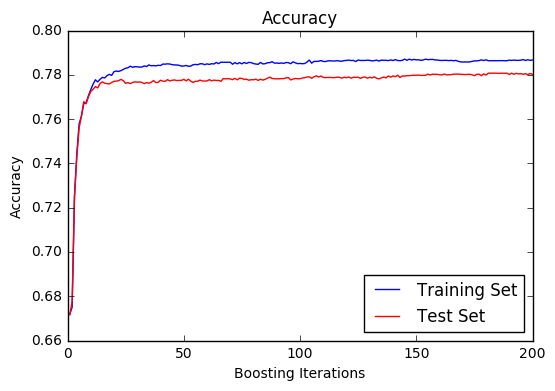

In [157]:
plot_staged_score(clf, clf.get_params(), X_train, y_train, X_test, y_test)

### Gradient Boosting


In [158]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=500)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print_scores(y_train, y_train_predict, y_test, y_test_predict)

Training score:
0.825270789281 0.876564147225 0.807371428571 0.85014447655
Testing score:
0.812430744434 0.859899776096 0.788266666667 0.835491557029


,Precision,Recall,Accuracy,F1-Score
Training Set,0.825271,0.876564,0.807371,0.850144
Testing Set,0.812431,0.859900,0.850144,0.835492


In [159]:
def plot_loss(clf, params, X_test, y_test):
    '''Plot training deviance. From sklearn documentation'''    
    # compute test set deviance
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        test_score[i] = clf.loss_(y_test, y_pred)

    plt.title('Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
             label='Training Set Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
             label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel(clf.loss)

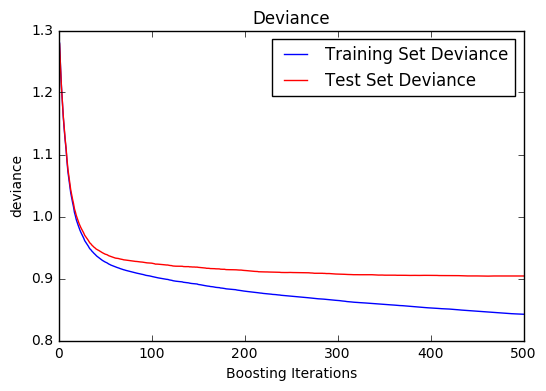

In [160]:
plot_loss(clf, clf.get_params(), X_test, y_test)

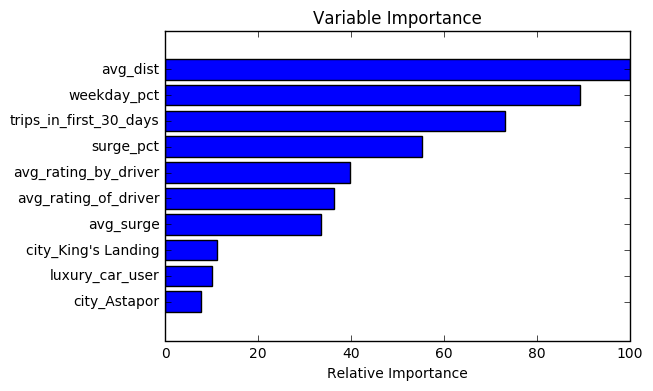

In [161]:
plot_importance(clf, df.columns, max_features=10)

### Support Vector Machine


In [162]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print_scores(y_train, y_train_predict, y_test, y_test_predict)

Training score:
0.786334325397 0.871934729798 0.772485714286 0.826925166815
Testing score:
0.780164489598 0.859686533746 0.7608 0.817997362281


,Precision,Recall,Accuracy,F1-Score
Training Set,0.786334,0.871935,0.772486,0.826925
Testing Set,0.780164,0.859687,0.826925,0.817997


#### Since all these algorithms have same sklearn API, we can pack them up and simplify our code

In [163]:
clf_LRC = LogisticRegression()
clf_KNC = KNeighborsClassifier()
clf_RFC = RandomForestClassifier()
clf_ABC = AdaBoostClassifier()
clf_GBC = GradientBoostingClassifier()
clf_SVC = SVC()

models = [clf_LRC, clf_KNC, clf_RFC, clf_ABC, clf_GBC, clf_SVC]

for clf in models:
    print("\n{}: \n".format(clf.__class__.__name__))
    clf.fit(X_train, y_train)
    y_train_predict = clf.predict(X_train)
    y_predict = clf.predict(X_test)
    print(print_scores(y_train, y_train_predict, y_test, y_predict))


LogisticRegression: 

Training score:
0.737689993667 0.854242104781 0.7198 0.791699411652
Testing score:
0.738834498834 0.844866190425 0.716266666667 0.788300835655
              Precision    Recall  Accuracy  F1-Score
Training Set   0.737690  0.854242  0.719800  0.791699
Testing Set    0.738834  0.844866  0.791699  0.788301

KNeighborsClassifier: 

Training score:
0.836286321758 0.865380208095 0.810485714286 0.850584551618
Testing score:
0.778793228788 0.799552191065 0.732666666667 0.789036195286
              Precision    Recall  Accuracy  F1-Score
Training Set   0.836286  0.865380  0.810486  0.850585
Testing Set    0.778793  0.799552  0.850585  0.789036

RandomForestClassifier: 

Training score:
0.99132080698 0.984232479259 0.9848 0.987763926584
Testing score:
0.802230239423 0.782386181896 0.743333333333 0.792183957681
              Precision    Recall  Accuracy  F1-Score
Training Set   0.991321  0.984232  0.984800  0.987764
Testing Set    0.802230  0.782386  0.987764  0.792184

Ad

#### We can look at cross validation score

In [164]:
from sklearn.cross_validation import cross_val_score

clf_LRC = LogisticRegression()
clf_KNC = KNeighborsClassifier()
clf_RFC = RandomForestClassifier()
clf_ABC = AdaBoostClassifier()
clf_GBC = GradientBoostingClassifier()
clf_SVC = SVC()

models = [clf_LRC, clf_KNC, clf_RFC, clf_ABC, clf_GBC, clf_SVC]

for clf in models:
    print "{}:\n".format(clf.__class__.__name__)
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
    print("F1-score: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


LogisticRegression:

F1-score: 0.79 (+/- 0.01)
KNeighborsClassifier:

F1-score: 0.79 (+/- 0.01)
RandomForestClassifier:

F1-score: 0.79 (+/- 0.01)
AdaBoostClassifier:

F1-score: 0.83 (+/- 0.01)
GradientBoostingClassifier:

F1-score: 0.83 (+/- 0.00)
SVC:

F1-score: 0.82 (+/- 0.01)


## Tuning Hyper-Parameters - Grid Search

In [165]:
from sklearn.grid_search import GridSearchCV

In [166]:
clf_LRC = LogisticRegression()
clf_KNC = KNeighborsClassifier()
clf_RFC = RandomForestClassifier()
clf_ABC = AdaBoostClassifier()
clf_GBC = GradientBoostingClassifier()
clf_SVC = SVC()

grid_LRC = {
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'C': [1, 10, 100],
}

grid_KNC = {
    'n_neighbors': [5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_RFC = {
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'auto', 2, 4, 8],
    'max_depth': [None, 2, 4, 8],
    'n_estimators': [50, 100, 200],
    'class_weight': [None, 'balanced']
}

grid_ABC = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.1, 0.5, 1, 5],
}

grid_GBC = {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [100, 200, 400],
    'max_features': [2, 4, 8],    
    'max_depth': [2, 4, 8],
}

grid_SVC =[
    {
        'kernel': ['rbf'], 
        'gamma': [1e-2, 1e-3, 'auto'],
        'C': [0.1, 1, 10]
    },
    {
        'kernel': ['linear'], 
        'C': [0.1, 1, 10]
    },
    {
        'kernel': ['poly'], 
        'degree': [2, 3],
        'C': [0.1, 1, 10]
    }
]

models = [clf_LRC, clf_KNC, clf_RFC, clf_ABC, clf_GBC, clf_SVC]
grids = [grid_LRC, grid_KNC, grid_RFC, grid_ABC, grid_GBC, grid_SVC]

result_models = []

for clf, grid in zip(models, grids):
    print("\n{}: \n".format(clf.__class__.__name__))
    print(grid)
    grid_obj = GridSearchCV(clf, param_grid=grid, scoring='f1', n_jobs=-1)                 
    grid_obj.fit(X_train, y_train)

    result_models.append(grid_obj)
    print(grid_obj.best_estimator_)
    
    y_train_predict = grid_obj.best_estimator_.predict(X_train)
    y_test_predict = grid_obj.best_estimator_.predict(X_test)
    print_scores(y_train, y_train_predict, y_test, y_test_predict)


LogisticRegression: 

{'penalty': ['l1', 'l2'], 'C': [1, 10, 100], 'class_weight': [None, 'balanced']}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training score:
0.737689993667 0.854242104781 0.7198 0.791699411652
Testing score:
0.738834498834 0.844866190425 0.716266666667 0.788300835655

KNeighborsClassifier: 

{'n_neighbors': [5, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=1,
           weights='uniform')
Training score:
0.825646338168 0.840216345052 0.7898 0.832867625344
Testing score:
0.791766795528 0.807975263887 0.747066666667 0.799788918206

RandomForestClassifier: 

{'max_features': [None, 'auto', 2, 4, 8], 'n_estimators'

/Users/stone/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stone/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stone/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/stone/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=400, random_state=None)
Training score:
0.806003146125 0.868955401751 0.787942857143 0.83629626362
Testing score:
0.803719628037 0.857021004371 0.779733333333 0.82951496388

GradientBoostingClassifier: 

{'n_estimators': [100, 200, 400], 'loss': ['deviance', 'exponential'], 'max_depth': [2, 4, 8], 'max_features': [2, 4, 8]}
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=8, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Training score:
0.831660465519 0.881101893019 0.814714285714 0.855667579177
Testing score:
0.81188818246 0.857767352596 0.7868 0.834197428453

SVC: 

[{'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.001